In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('./medical-costs.csv')
display(df.head(),df.describe(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


None

Text(0.5, 1.0, 'Distribution of Charges')

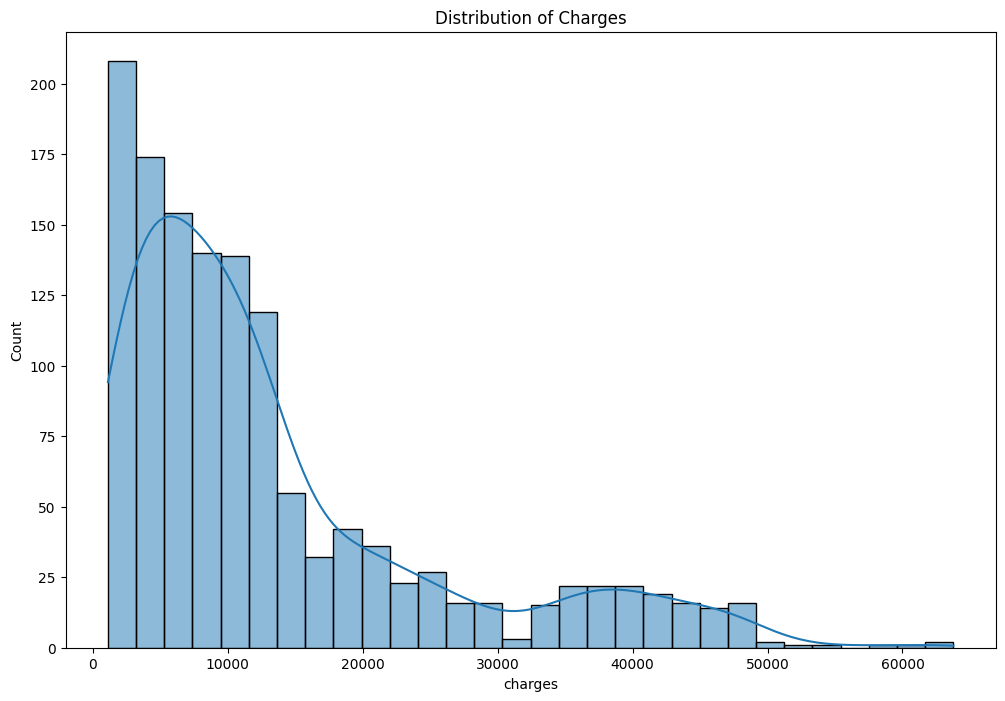

In [4]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.histplot(df['charges'], kde = True)
plt.title('Distribution of Charges')

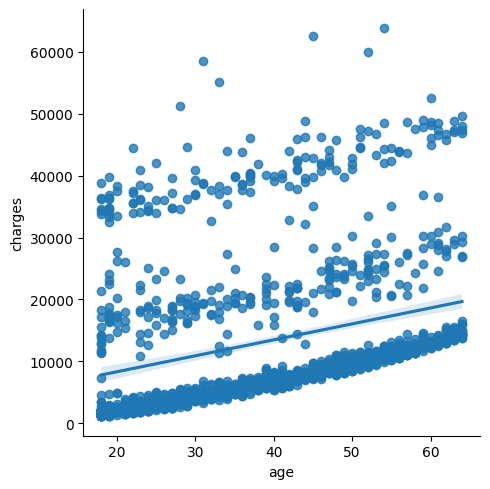

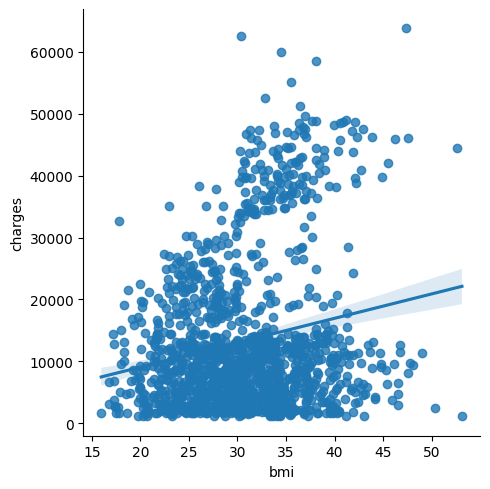

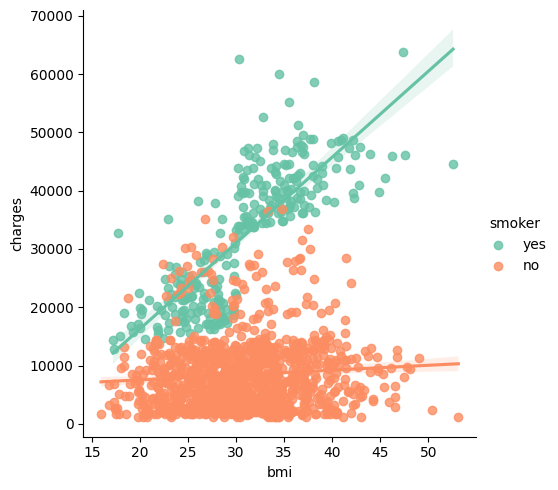

In [6]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, palette='Set3')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')


In [7]:
## 1. converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes
## 2. converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

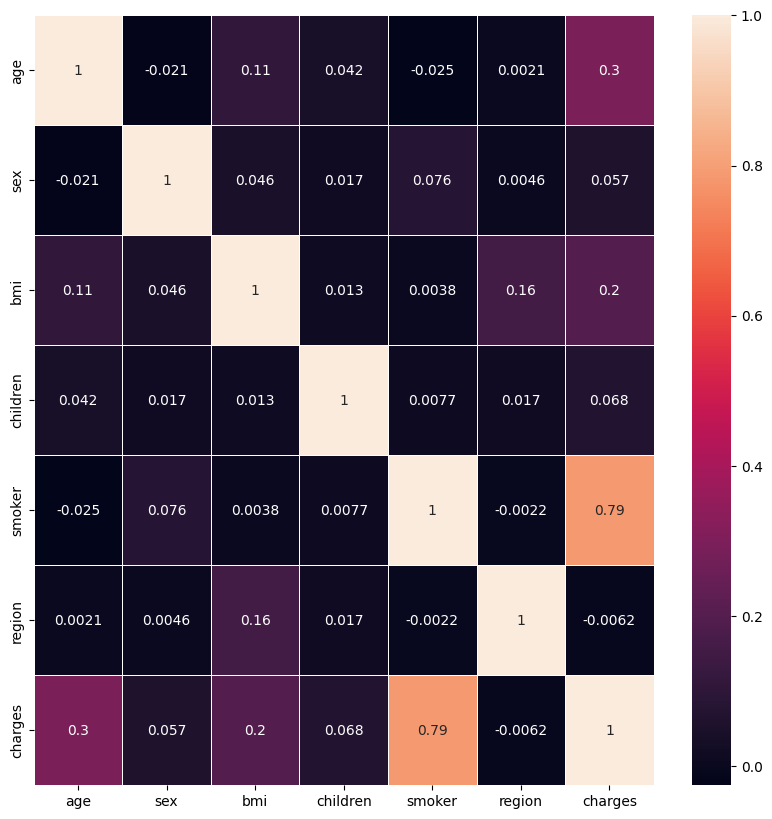

In [8]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, linewidths=0.5)

In [9]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
rfr = rfr(n_estimators = 100, criterion = 'squared_error', random_state=0)
rfr.fit(x_train,y_train)
y_test_pred = rfr.predict(x_test)

print('r2 test data: %.3f' % (metrics.r2_score(y_test, y_test_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

r2 test data: 0.871


,Actual,Predicted
578,9724.53000,11172.228972
610,8547.69130,10139.993641
569,45702.02235,44405.790015
1034,12950.07120,13274.336006
198,9644.25250,10381.324182
...,...,...
1084,15019.76005,15876.909377
726,6664.68595,6620.322827
1132,20709.02034,11399.675155
725,40932.42950,42861.600790


Feature importance ranking


1.smoker(0.606920)
2.bmi(0.215579)
3.age(0.136042)
4.children(0.021231)
5.region(0.014214)
6.sex(0.006014)


<BarContainer object of 6 artists>

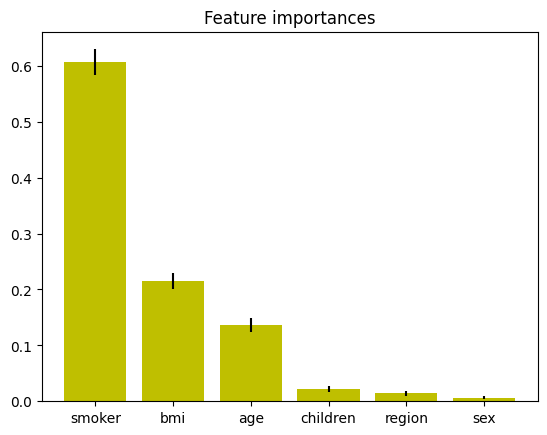

In [10]:
print('Feature importance ranking\n\n')
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],color="y", yerr=std[indices], align="center")